# Week 5: Debugging & Testing in R

POP77001 Computer Programming for Social Scientists

Tom Paskhalis

## Overview

-   Software bugs
-   Debugging
-   Handling conditions
-   Testing
-   Defensive programming

# Bugs

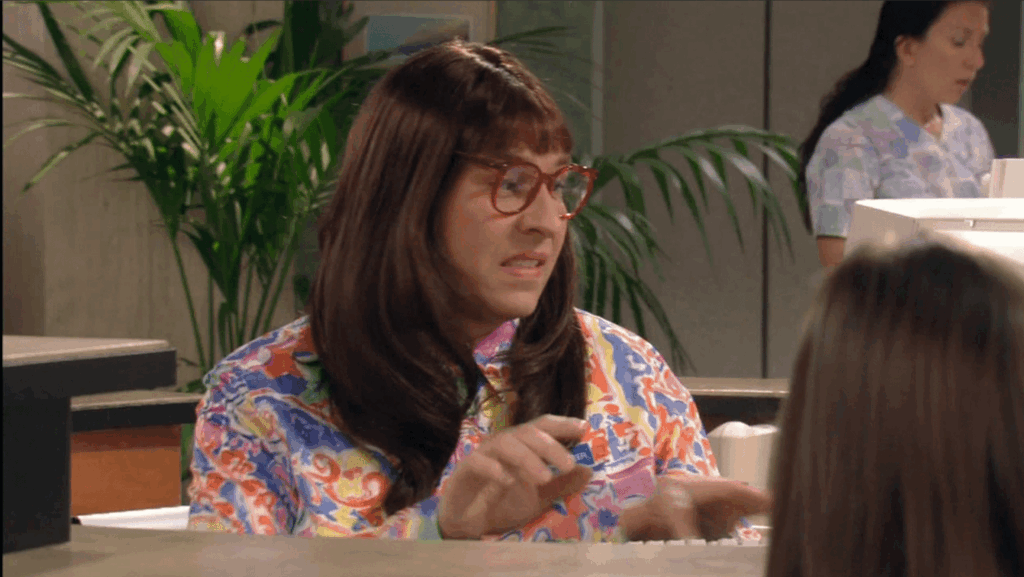

## Computer Bugs Before

<figure>
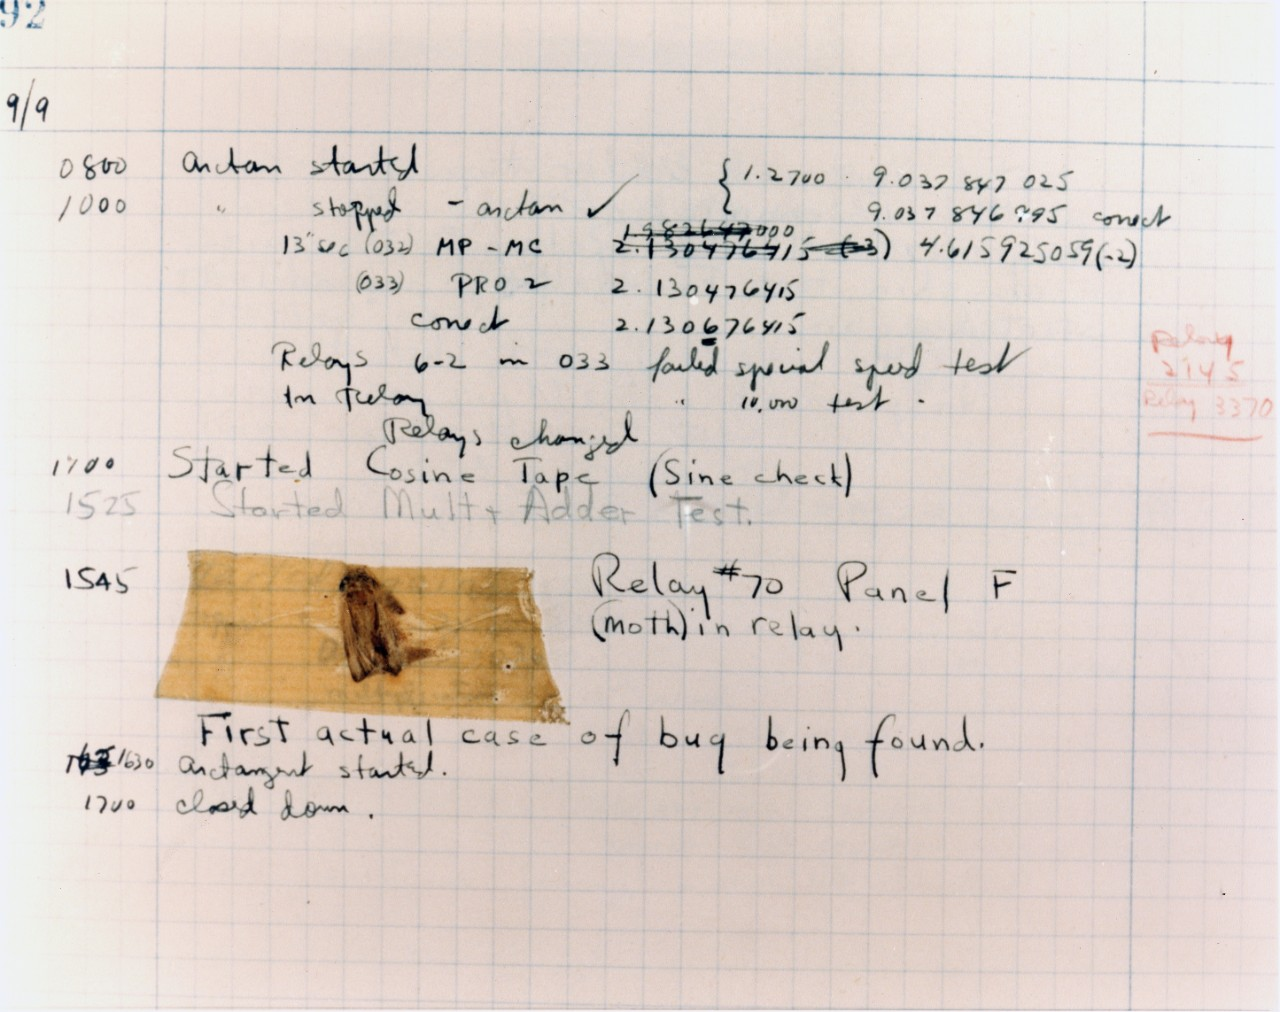
<figcaption aria-hidden="true"><a
href="https://www.history.navy.mil/content/history/nhhc/our-collections/photography/numerical-list-of-images/nhhc-series/nh-series/NH-96000/NH-96566-KN.html">US
Naval History and Heritage Command</a></figcaption>
</figure>

<figure>
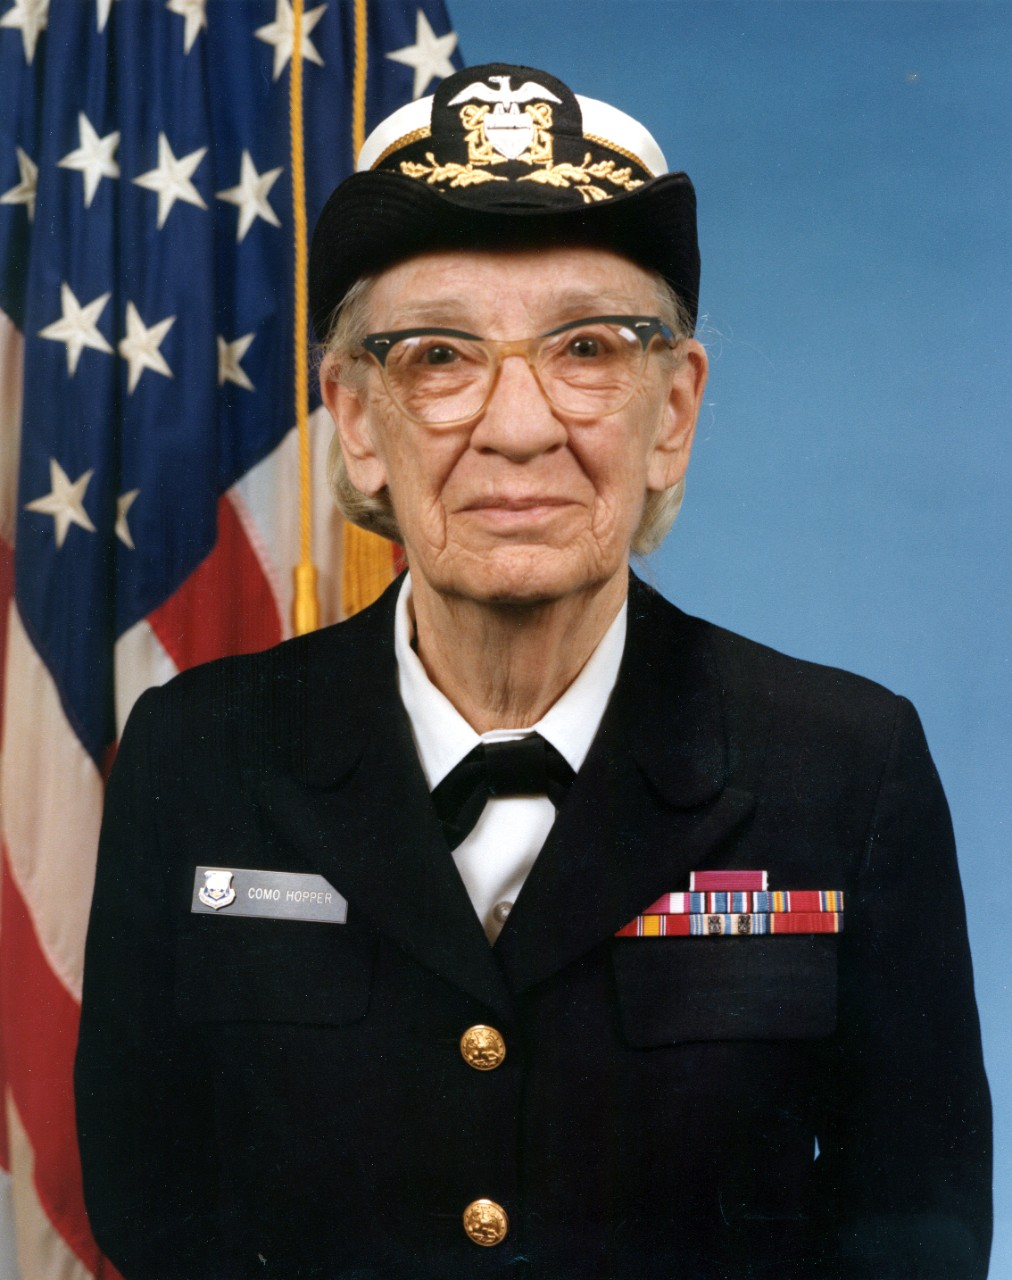
<figcaption aria-hidden="true"><a
href="https://www.navy.mil/Women-In-the-Navy/Past/Display-Past-Woman-Bio/Article/2958917/rear-adm-grace-murray-hopper/">US
Navy</a></figcaption>
</figure>

Grace Murray Hopper popularised the term *bug* after in 1947 her team
traced an error in the Mark II to a moth trapped in a relay.

## Computer Bugs Today

In [ ]:
convert_mark_to_grade <- function(mark) {
  if (mark >= 70) {
    grade <- "I"
  } else if (mark >= 60) {
    grade <- "II.1"
  } else if (mark >= 50) {
    grade <- "II.2"
  } else {
    grade <- "F"
  }
  grade
}

. . .

In [ ]:
convert_mark_to_grade(146)

[1] "I"

. . .

In [ ]:
convert_mark_to_grade(-3.7)

[1] "F"

## Explicit Expectations

-   Make explicit what kind of input your function expects.
-   Conditional statements (or type conversion) at the beginning help
    check that.

In [ ]:
convert_mark_to_grade <- function(mark) {
  stopifnot(is.numeric(mark))
  stopifnot(mark >= 0 & mark <= 100)
  if (mark >= 70) {
    grade <- "I"
  } else if (mark >= 60) {
    grade <- "II.1"
  } else if (mark >= 50) {
    grade <- "II.2"
  } else {
    grade <- "F"
  }
  grade
}

. . .

In [ ]:
convert_mark_to_grade(146)

. . .

In [ ]:
convert_mark_to_grade("55")

## Types of Bugs

-   *Overt* vs *covert*
    -   Overt bugs have obvious manifestation (e.g. premature program
        termination, crash)
    -   Covert bugs manifest themselves in wrong (unexpected) results
-   *Persistent* vs *intermittent*
    -   Persistent bugs occur for every run of the program with the same
        input
    -   Intermittent bugs occur occasionally even given the same input
        and other conditions

# Debugging

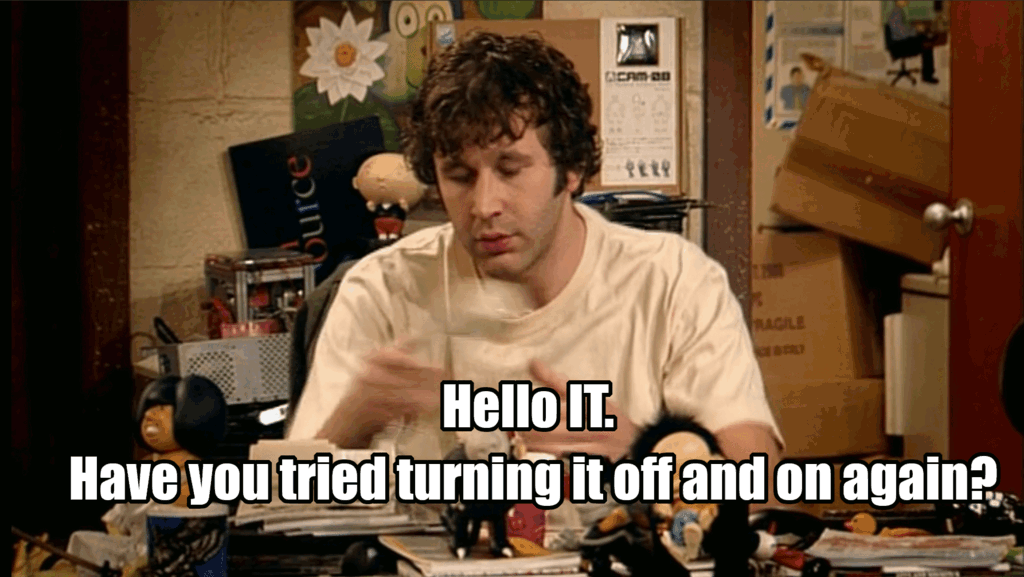

## Debugging

> Fixing a buggy program is a process of confirming, one by one, that
> the many things you believe to be true about the code actually are
> true. When you find that one of your assumptions is not true, you have
> found a clue to the location (if not the exact nature) of a bug.
>
> Norman Matloff

. . .

> When you have eliminated all which is impossible, then whatever
> remains, however improbable, must be the truth.
>
> Arthur Conan Doyle

. . .

-   Process of finding, isolating and fixing an existing problem in
    computer program.

# Debugging Process

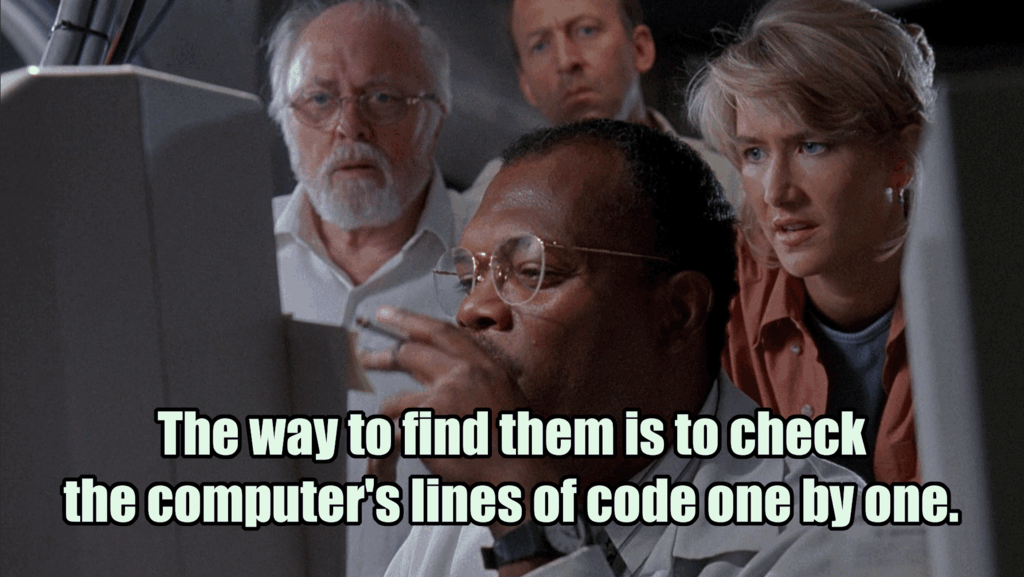

## Debugging Process

1.  Realise that you have a bug
    -   Could be non-trivial for covert and intermittent bugs
2.  Make it reproducible
    -   Extremely important step that makes debugging easier
    -   Isolate the smallest snippet of code that repeats the bug
    -   Test with different inputs/objects
    -   Will also be helpful if you are seeking outside help
    -   Provides a case that can be used in automated testing
3.  Figure out where it is
    -   Formulate hypotheses, design experiments
    -   Test hypotheses on a reproducible example
    -   Keep track of the solutions that you have attempted
4.  If it worked:
    -   Fix the bug and test the use-case
5.  Otherwise:
    -   Sleep on it

## Debugging with `print()`

-   `print()` statement can be used to check the internal state of a
    program during evaluation.
-   Can be placed in critical parts of code (before or after
    loops/function calls/objects loading).
-   Can be combined with function `ls()` (and `get()`/`mget()`) to
    reveal all local objects.
-   For harder cases switch to R debugging
    functions(`debug()`/`debugonce()`).

## Bug: Example

In [ ]:
calculate_median <- function(a) {
  a <- sort(a)
  n <- length(a)
  m <- (n + 1) %/% 2
  if (n %% 2 == 1) {
    med <- a[m]
  } else {
    med <- mean(a[m:m+1])
  }
  return(med)
}

. . .

In [ ]:
v1 <- c(1, 2, 3)
v2 <- c(0, 1, 2, 2)

. . .

In [ ]:
calculate_median(v1)

[1] 2

. . .

In [ ]:
calculate_median(v2)

[1] 2

## Debugging with `print()`: Example

In [ ]:
calculate_median <- function(a) {
  a <- sort(a)
  n <- length(a)
  m <- (n + 1) %/% 2
  print(m)
  if (n %% 2 == 1) {
    med <- a[m]
  } else {
    med <- mean(a[m:m+1])
  }
  return(med)
}

. . .

In [ ]:
# v1 <- c(1, 2, 3)
calculate_median(v1)

[1] 2

[1] 2

. . .

In [ ]:
# v2 <- c(0, 1, 2, 2)
calculate_median(v2)

[1] 2

[1] 2

## Debugging with `print()` and `ls()`: Example

In [ ]:
calculate_median <- function(a) {
  a <- sort(a)
  n <- length(a)
  m <- (n + 1) %/% 2
  # Print all objects in function environment
  print(mget(ls()))
  if (n %% 2 == 1) {
    med <- a[m]
  } else {
    med <- mean(a[m:m+1])
  }
  return(med)
}

. . .

In [ ]:
calculate_median(v1)

$a
[1] 1 2 3

$m
[1] 2

$n
[1] 3

[1] 2

. . .

In [ ]:
calculate_median(v2)

$a
[1] 0 1 2 2

$m
[1] 2

$n
[1] 4

[1] 2

## Debugging with `print()`: Example

In [ ]:
calculate_median <- function(a) {
  a <- sort(a)
  n <- length(a)
  m <- (n + 1) %/% 2
  if (n %% 2 == 1) {
    med <- a[m]
  } else {
    print(m:m+1)
    med <- mean(a[m:m+1])
  }
  return(med)
}

. . .

In [ ]:
calculate_median(v1)

[1] 2

. . .

In [ ]:
calculate_median(v2)

[1] 3

[1] 2

## Fixing a Bug and Confirming

In [ ]:
calculate_median <- function(a) {
  a <- sort(a)
  n <- length(a)
  m <- (n + 1) %/% 2
  if (n %% 2 == 1) {
    med <- a[m]
  } else {
    med <- mean(a[m:(m+1)])
  }
  return(med)
}

. . .

In [ ]:
calculate_median(v1)

[1] 2

. . .

In [ ]:
calculate_median(v2)

[1] 1.5

## R Debugging Facilities

-   The core of R debugging process is stepping through the code as it
    gets executed.
-   This permits the inspection of the environment where a problem
    occurs.
-   Three functions provide the the main entries into the debugging
    mode:
    -   `browser()` - pauses the execution at a dedicated line in code
        (breakpoint);
    -   `debug()`/`undebug()` - (un)sets a flag to run function in a
        debug mode (setting through);
    -   `debugonce()` - triggers single stepping through a function.

## Breakpoints

In [ ]:
calculate_median <- function(a) {
  a <- sort(a)
  n <- length(a)
  m <- (n + 1) %/% 2
  if (n %% 2 == 1) {
    med <- a[m]
  } else {
    browser()
    med <- mean(a[m:m+1])
  }
  return(med)
}

. . .

In [ ]:
## Example for running in RStudio
calculate_median(v2)

Called from: calculate_median(v2)
debug: med <- mean(a[m:m + 1])
debug: return(med)

[1] 2

## Debugger Commands

| Command      | Description                                                  |
|:-------------|:---------------------------------------------------------|
| `n(ext)`     | Execute next line of the current function                    |
| `s(tep)`     | Execute next line, stepping inside the function (if present) |
| `c(ontinue)` | Continue execution, only stop when breakpoint in encountered |
| `f(inish)`   | Finish execution of the current loop or function             |
| `Q(uit)`     | Quit from the debugger, executed program is aborted          |

## Conditions

-   Conditions are **events** that signal special situations during
    execution
-   Some conditions can modify the control flow of a program
    (e.g. error)
-   They can be *caught* and *handled* by your code
-   You can also incorporate condition triggers into your code

> **Extra**
>
> [Hadley Wickham - Conditions](https://adv-r.hadley.nz/conditions.html)

## Conditions: Example

. . .

In [ ]:
42 + "ab" # Throws an error

. . .

In [ ]:
as.numeric(c("42", "55.3", "ab", "7")) # Triggers a warning

[1] 42.0 55.3   NA  7.0

. . .

In [ ]:
library("dplyr") # Shows a message


Attaching package: 'dplyr'

The following object is masked from 'package:testthat':

    matches

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

## Signalling Conditions

Rather than waiting for a condition to occur, we can signal it
ourselves.

. . .

In [ ]:
stop("Error message")

. . .

In [ ]:
warning("Warning message")

. . .

In [ ]:
message("Just message")

Just message

## Errors

-   In R errors are *signalled* (or *thrown*) with `stop()`
-   By default, the error message includes the call.
-   Program execution stops once an error is raised

. . .

In [ ]:
if (c(TRUE, TRUE, FALSE)) {
  print("This used to work pre R 4.2.0")
}

. . .

In [ ]:
# Triggered a warning since R 4.2.0 to R 4.3.0
c(TRUE, FALSE) && c(TRUE, TRUE)

. . .

In [ ]:
log("x")

## Warnings

-   Weaker versions of errors:
    -   Something went wrong, but the program has been able to recover
        and continue.
-   Single call in result in multiple warnings (as opposed to a single
    error).
-   Take note of the warnings resulting from base R operations.
-   Some of them might eventually become errors.

. . .

In [ ]:
as.numeric("x")

[1] NA

## Messages

-   Messages serve mostly informational purposes.
-   They tell the user:
    -   that something was done
    -   the details of how something was done.
-   Sometimes these actions are not anticipated.
-   Useful for functions with side-effects (accessing server, writing to
    disk, etc.)

. . .

In [ ]:
anscombes_quartet <- readr::read_csv("../data/anscombes_quartet.csv")

Rows: 44 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): dataset
dbl (2): x, y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

## Handling Conditions

-   Every condition has default behaviour:
    -   Errors terminate program execution
    -   Warnings are captured and displayed in aggregate
    -   Message are shown immediately
-   But with **condition handlers** we can override the default
    behaviour.

## Ignoring Conditions

-   The simplest way of handling conditions is **ignoring** them.
-   Heavy-handed approach, given the type of condition does not make
    further distinctions.
-   Bear in mind the risks of ignoring the information (especially,
    errors!)
-   Functions for handling conditions depend on the type of condition:
    -   `try()` for errors
    -   `suppressWarnings()` for warnings
    -   `suppressMessages()` for messages

## Ignoring Conditions: Example

. . .

In [ ]:
suppressMessages(
  anscombes_quartet <- readr::read_csv("../data/anscombes_quartet.csv")
)

. . .

In [ ]:
# But some functions would provide arguments to silence messages
# This should be preferred to heavy-handed suppressMessages()
anscombes_quartet <- readr::read_csv(
  "../data/anscombes_quartet.csv",
  show_col_types = FALSE
)

. . .

In [ ]:
# suppressPackageStartupMessages() - a variant for package startup messages
# But suppressMessages() would also work.
suppressPackageStartupMessages(library("dplyr"))

## Ignoring Errors

. . .

In [ ]:
f1 <- function(x) {
  log(x)
  10
}

. . .

In [ ]:
f1("x")

. . .

In [ ]:
f2 <- function(x) {
  try(log(x))
  10
}

. . .

In [ ]:
f2("x")

Error in log(x) : non-numeric argument to mathematical function

[1] 10

## Condition Handlers

-   More advanced approach to dealing with conditions is providing
    handlers.
-   They allow to override or supplement the default behaviour.
-   In particular, two function can:
    -   `tryCatch()` define **exiting** handlers
-   `withCallingHandlers()` define **calling** handlers

    tryCatch(
      error = function(cnd) {
        # code to run when error is thrown
      },
      code_to_run_while_handlers_are_active
    )

    withCallingHandlers(
      warning = function(cnd) {
        # code to run when warning is signalled
      },
      message = function(cnd) {
        # code to run when message is signalled
      },
      code_to_run_while_handlers_are_active
    )

## Exiting Handlers

-   The handlers set up by `tryCatch()` are called exiting handlers.
-   After the condition is signalled, control flow passes to the
    handler.
-   It never returns to the original code, effectively meaning that the
    code exits.

In [ ]:
log("x")

. . .

In [ ]:
f3 <- function(x) {
  tryCatch(
    error = function(cnd) NA,
    log(x)
  )
}

. . .

In [ ]:
f3("x")

[1] NA

## Calling Handlers

-   With calling handlers code execution continues normally once the
    handler returns.
-   A more natural pairing with the non-error conditions.

In [ ]:
as.numeric("x")

[1] NA

. . .

In [ ]:
f4 <- function(x) {
  withCallingHandlers(
    warning = function(cnd) {
      print("This is not a number. Please, try again.")
    },
    x <- as.numeric(x)
  )
}

. . .

In [ ]:
f4("x")

[1] "This is not a number. Please, try again."

Warning in withCallingHandlers(warning = function(cnd) {: NAs introduced by
coercion

## Expectations

-   When designing a function you built in certain expectations about:
    -   Acceptable inputs;
    -   Conditions triggered;
    -   Returned object.
    -   Etc.
-   Checking inputs at the beginning helps fail fast.

. . .

In [ ]:
calculate_median <- function(a) {
  stopifnot(is.numeric(a))
  a <- sort(a)
  n <- length(a)
  m <- (n + 1) %/% 2
  if (n %% 2 == 1) {
    med <- a[m]
  } else {
    med <- mean(a[m:(m+1)])
  }
  return(med)
}

## Checking Expectations

-   What if we want to check whether our function’s behaviour matches
    our expectations?
-   One option would be to use `==` (or `!=`).
-   However, for numerical values it can be problematic:

. . .

In [ ]:
v3 <- c(7.22, 1.54, 3.47, 2.75)

. . .

In [ ]:
calculate_median(v3)

[1] 3.11

. . .

In [ ]:
calculate_median(v3) == 3.11

[1] FALSE

. . .

In [ ]:
all.equal(calculate_median(v3), 3.11)

[1] TRUE

## R Warned Us

In [ ]:
?`==`

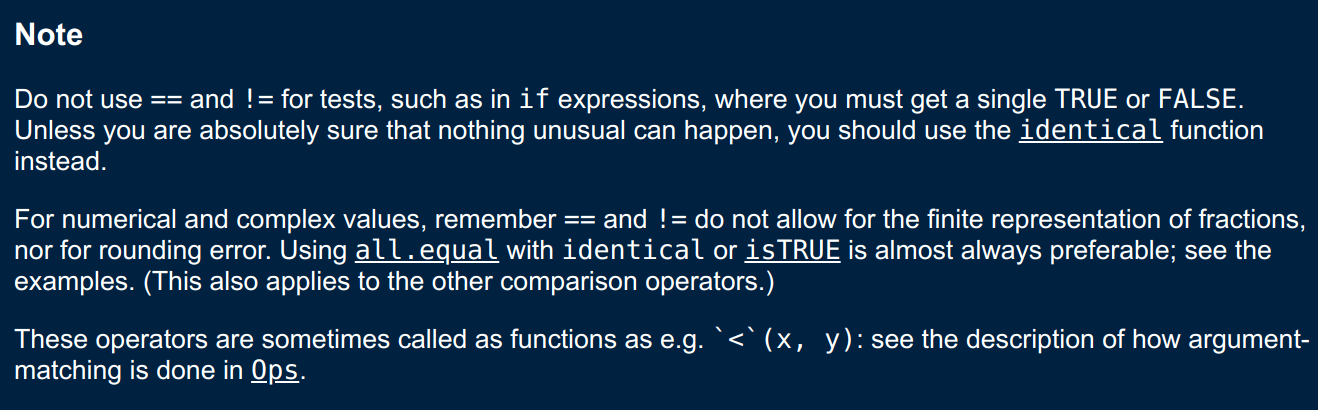

## Making Comparisons

-   A better way to compare values where a single `TRUE` or `FALSE` is
    expected is to use special functions:
    -   `all.equal()` - approximately equal
    -   `identical()` - exactly identical (incl. type)
    -   `isTRUE()` - whether value is `TRUE`
    -   `isFALSE()` - whether value is `FALSE`

. . .

In [ ]:
all.equal(length(calculate_median(v3)), 1)

[1] TRUE

. . .

In [ ]:
# Note that the output of length is of type integer
identical(length(calculate_median(v3)), 1)

[1] FALSE

. . .

In [ ]:
identical(length(calculate_median(v3)), 1L)

[1] TRUE

## Formalising Expectations Checks: Testing

-   Process of running a program on pre-determined cases to ascertain
    that its functionality is consistent with expectations
-   Test cases consist of different assertions (of equality, boolean
    values, etc.)
-   Fully-featured unit testing framework in R is provided in `testthat`
    library

> **Extra**
>
> [Hadley Wickham - Testing](https://r-pkgs.org/tests.html)

## Testing: Example

In [ ]:
library("testthat")

In [ ]:
calculate_median <- function(a) {
  stopifnot(is.numeric(a))
  a <- sort(a)
  n <- length(a)
  m <- (n + 1) %/% 2
  if (n %% 2 == 1) {
    med <- a[m]
  } else {
    med <- mean(a[m:(m+1)])
  }
  return(med)
}

## Testing: Example

In [ ]:
testthat::test_that("The length of result is 1", {
  testthat::expect_equal(
    length(calculate_median(c(0, 1, 2, 2))), 
    1L
  )
  testthat::expect_equal(
    length(calculate_median(c(1, 2, 3))),
    1L
  )
  testthat::expect_equal(
    length(calculate_median(c(7.22, 1.54, 3.47, 2.75))),
    1L
  )
})

Test passed 🥳

## Testing: Example

In [ ]:
testthat::test_that("Error on non-numeric input", {
  testthat::expect_error(
    calculate_median(c("a", "bc", "xyz"))
  )
  testthat::expect_error(
    calculate_median(c(TRUE, FALSE, FALSE))
  )
  testthat::expect_error(
    calculate_median(c("0", "1", "2", "2"))
  )
})

Test passed 🎉

## Testing: Example

In [ ]:
testthat::test_that("The result is numeric", {
  testthat::expect_true(
    is.numeric(calculate_median(c(0, 1, 1, 2)))
  )
  testthat::expect_true(
    is.numeric(calculate_median(c(1, 2, 3)))
  )
  testthat::expect_true(
    is.numeric(calculate_median(c("a", "bc", "xyz")))
  )
})

── Error: The result is numeric ────────────────────────────────────────────────
Error in `calculate_median(c("a", "bc", "xyz"))`: is.numeric(a) is not TRUE
Backtrace:
    ▆
 1. ├─testthat::expect_true(...)
 2. │ └─testthat::quasi_label(enquo(object), label, arg = "object") at testthat/R/expect-constant.R:33:3
 3. │   └─rlang::eval_bare(expr, quo_get_env(quo)) at testthat/R/quasi-label.R:45:3
 4. └─global calculate_median(c("a", "bc", "xyz")) at rlang/R/eval.R:96:3
 5.   └─base::stopifnot(is.numeric(a))

## Defensive Programming

-   Design your program to facilitate earlier failures, testing and
    debugging.
-   Make code fail fast and in well-defined manner.
-   Split up different componenets into functions or modules.
-   Be strict about accepted inputs, use assertions or conditional
    statements to check them.
-   Document assumptions and acceptable inputs using docstrings.
-   Document non-trivial, potentially problematic and complex parts of
    code.

## 

> All of old. Nothing else ever. Ever tried. Ever failed. No matter. Try
> again. Fail again. Fail better.
>
> Samuel Beckett

## Next

-   Tutorial: Using Debugger and Testing
-   Next week: Data Wrangling in R